# Newsgroup Post topic (category) classification using Naive Bayes Classifier
* ICS3C - 110605 - Alphonce Mutebi
* ICS3C - 103673 - Jeffery King'ori
* ICS3C - 111643 - James Kinyanjui

##### Introduction
We trained our model using the [20 news group dataset](https://https://scikit-learn.org/stable/datasets/index.html#newsgroups-dataset) to classify news into 20 topics using Gaussian Naive Bayes.  
We then checked the performance of our model using a confusion matrix.

#### Importing dataset and Libraries
* Importing dataset from scikitlearn.  
* Importing count Vectorizer for feature scaling.
* Importing Gaussian Naive Bayes which will be the classifier.
* Importing confusion matrix for performance measure.  
* Importing matplotlib for visualization.


In [38]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

#### Importing the dataset
* Importing the dataset from the two available train and test subsets into train and test sets. Import specifies the categories and removal of headers, footers and quotes.  
* We didn't use all categories to minimise the dataset size to one managable with colab RAM allocation.


In [39]:
cats = [
        'alt.atheism',
        'comp.graphics',
        'comp.os.ms-windows.misc',
        'comp.sys.ibm.pc.hardware',
        'comp.sys.mac.hardware',
        'comp.windows.x',
        'misc.forsale',
        'rec.autos',
        'rec.motorcycles',
        'rec.sport.baseball',
        'rec.sport.hockey'
        ]

data_train = fetch_20newsgroups(subset='train', categories=cats,
                                shuffle=True, random_state=42,
                                remove=('headers', 'footers', 'quotes'))

data_test = fetch_20newsgroups(subset='test', categories=cats,
                               shuffle=True, random_state=42,
                               remove=('headers', 'footers', 'quotes'))
X_train = data_train.data
y_train = data_train.target
X_test = data_test.data
y_test = data_test.target

In [40]:
print(list(data_train.target_names))
X_train[:5]

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']


['Wharf Wrat rites:\n\n\nEver\' once in a while, you still see a reference to the super-\nslab system as "Interstate and Defense Highways."  But whether\nthe military has much of anything that goes 80 on the road is\nanother matter.  A few of their most whomped-up diesel trucks,\nmaybe, load permitting.  The military surplus stuff I\'ve\ndriven -- "Jeep Classic" (Willys/Kaiser/AMC, pre-independent\nsuspension) and Power Wagons (Slant 6 in a crew-cab pickup)\nweren\'t exactly congenial at highway speeds, and I wouldn\'t\nswear any of them would do 80 except as a bedload on a semi.\n\nYou just gotta love the standard military tire, too, or at\nleast the one they used to use.  Designed circa WW II as a\ncompromise between traction in icky sticky goo and longevity\non sharp rocks and so forth, it\'s quite ill-adapted to high\nspeeds on civilian roadways.  For those who can\'t remember\nwhat they look like, imagine a mountain-bike tire with a\nroad rib in the middle, scaled up to car size. 

#### Data preparation
* Converting the words in the data to vectors using count vectorization.  
* Printing the vectorized data


In [41]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train)

  (0, 66798)	1
  (0, 67546)	1
  (0, 54609)	1
  (0, 26932)	1
  (0, 47575)	1
  (0, 34487)	6
  (0, 66853)	1
  (0, 69954)	4
  (0, 59307)	2
  (0, 56600)	1
  (0, 53604)	1
  (0, 61936)	7
  (0, 61376)	14
  (0, 59915)	1
  (0, 57777)	1
  (0, 60370)	1
  (0, 14768)	3
  (0, 35181)	2
  (0, 14060)	11
  (0, 23245)	1
  (0, 32592)	1
  (0, 18106)	2
  (0, 66841)	1
  (0, 43090)	3
  (0, 32068)	1
  :	:
  (6389, 52893)	1
  (6389, 13857)	1
  (6389, 27824)	1
  (6389, 49634)	1
  (6389, 12621)	1
  (6389, 50108)	1
  (6389, 41545)	4
  (6389, 35537)	1
  (6389, 33301)	1
  (6389, 37427)	1
  (6389, 59290)	1
  (6389, 52866)	1
  (6389, 28240)	1
  (6389, 56200)	1
  (6389, 15266)	4
  (6389, 15269)	2
  (6389, 57116)	2
  (6389, 62348)	1
  (6389, 41555)	1
  (6389, 38845)	1
  (6389, 31039)	1
  (6389, 44183)	1
  (6389, 24076)	1
  (6389, 20959)	1
  (6389, 19719)	1


#### Training the model
* Training the Naive Bayes model on the training set by fitting the classifier object on X_train and y_train data. The .toarray() with X_train is used for converting it to a dense matrix.

In [42]:
classifier = GaussianNB()
classifier.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Predicting the results
Using the .predict() method on the classifier object and passing the X_test to predict the results of the trained model.

In [43]:
y_pred = classifier.predict(X_test.toarray())

#### Making the confusion matrix


In [44]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[229   4   0   7  22   3   7  14  13  12   8]
 [  7 239   4  26  52  42   9   2   6   2   0]
 [  5  75  19 107  94  51  23   7   4   6   3]
 [  0  24   5 234  85  11  20   5   5   1   2]
 [  0  22   2  45 258   9  26   8   6   8   1]
 [  0  58   3  18  38 254   3   2   8   7   4]
 [  1  14   0  40  57   7 219  21  16   6   9]
 [  7   6   1   1  39   1  17 266  49   9   0]
 [ 16   3   0   2  30   0  11  56 260  13   7]
 [ 12   1   0   0  27   1   3   5   8 318  22]
 [  9   2   0   1  16   2   5   7   3  24 330]]


#### Visualizing the Confusion Matrix results


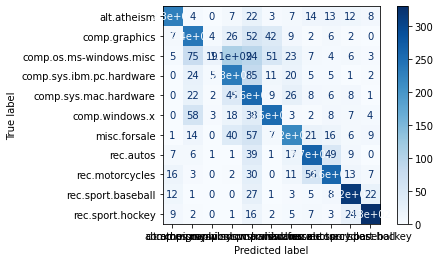

In [45]:
plot_confusion_matrix(classifier, X_test.toarray(), y_test, display_labels=cats, cmap=plt.cm.Blues)